# Wavelet Filtering

**Background**
--
Other than classical frequency filtering, Wavelet filtering is one of common techniques used in signal processing. It allows to filter out short-time duration patterns captured by used wavelet. The patterns to be filtered out depends on the wavelet family (e.g. *db3*) used and number of level of decomposition. 

Algorithmically, it is very straightforward. Decompose a signal $x(n)$, into wavelet coefficients $X(k)$, where each coefficient represents the strength of wavelet pattern at particular time. With some threshold, remove the coefficients by zeroing out and reconstruct the signal back.

The machanism to choose a threshold on the strength of wavelet coefficient depends on the application and objective. To remove the noise and compress the signal, a widely used approach is to filter out all the wavelet coefficients with smaller strength.

Literature [1] suggest the **optimal threshold** on the wavelet coeffiecient is

$$ \theta = \tilde{\sigma} \sqrt{2log(N)}$$
where $\tilde{\sigma}$ is estimation of noise variance and $N$ length of signal
$$ \tilde{\sigma} = median(|X(k)|)/0.6745$$
and $X(k)$ are wavelet coeffients of $x(n)$

There are other methods to choose threshold too. One can choose a $\theta =1.5\times SD(X(k))$ or $\theta =IQR(X(k))$ as to select the outliers, by standard deviation and interquartile range, respectively.

According to the theory, the **optimal threshold** should be applied by zeroing out the coefficients below with magnitude lower than threshold $|X(k)|<\theta$, and for later two methods of thresholds,standard deviation and interquartile range, the coefficients outside of the threshold should be zeroing out, since they reprepresent the outliers. However, some of the (weired) articles use these thresholds in other-way round.

A simple block-diagram shown below is the procedure of wavelet filtering.

<div style="align: left; text-align:center;">
    <img src="https://raw.githubusercontent.com/spkit/spkit.github.io/master/assets/images/wavelet_filtering_block_dia_1.png" width="700" />
    <div class="caption">Fig 1: Wavelet Filtering</div>
</div>


**References:**
* [1] D.L. Donoho, J.M. Johnstone, **Ideal spatial adaptation by wavelet shrinkage** Biometrika, 81 (1994), pp. 425-455

API
--
* **spkit.wavelet_filtering(...)**
* **spkit.wavelet_filtering_win(...)**


In ***spkit***, we have implemented all three methods for threshold computing, can be chosen by *threshold = 'optimal', 'sd' or 'iqr'* or can be passed as a float value for a fixed threshold, e.g. *threshold = 0.5*. It also support to choose, if you want to zero out coefficient below the threshold or above by setting *filter_out_below* True or False. However, default setting is *threshold='optimal'* and *filter_out_below=True*.

There are a few more options to tune threshold and mode of filtering. For more details see doc section or run ```help(sp.wavelet_filtering)```

In [5]:
import numpy as np
import matplotlib.pyplot as plt


import spkit as sp
sp.__version__

'0.0.9.4'

## Example with EEG sample signal 

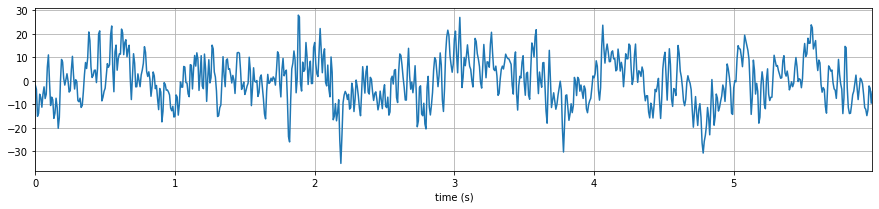

In [6]:
x,fs = sp.load_data.eegSample_1ch()
x = x[fs*2:fs*8]
t = np.arange(len(x))/fs

plt.figure(figsize=(15,3))
plt.plot(t,x)
plt.xlim([t[0],t[-1]])
plt.grid()
plt.xlabel('time (s)')
plt.show()

### Wavelet filtering with optimal threshold ans db3

WPD: False  wv: db3  threshold: optimal  k: 1.5  mode: elim  filter_out_below?: True


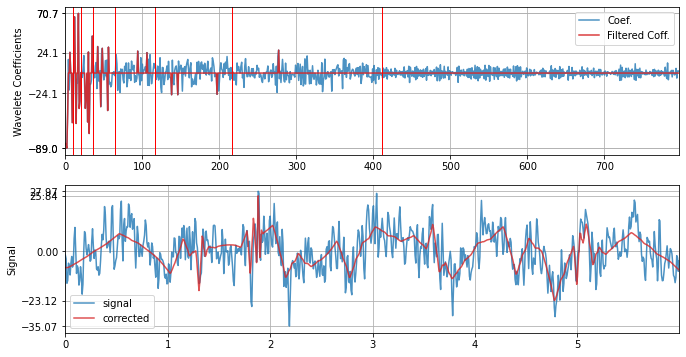

In [10]:
xf = sp.wavelet_filtering(x.copy(),wv='db3',threshold='optimal',verbose=1,WPD=False,show=True,fs=fs)

### with SD threshold

WPD: False  wv: db3  threshold: sd  k: 1.5  mode: elim  filter_out_below?: True


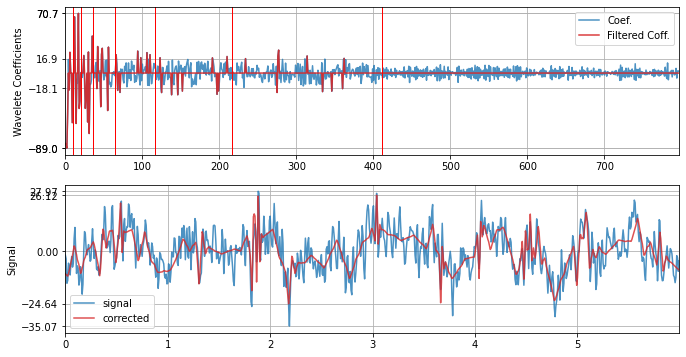

In [19]:
xf = sp.wavelet_filtering(x.copy(),wv='db3',threshold='sd',verbose=1,WPD=False,show=True,fs=fs)

### with IQR

WPD: False  wv: db3  threshold: iqr  k: 1.5  mode: elim  filter_out_below?: True


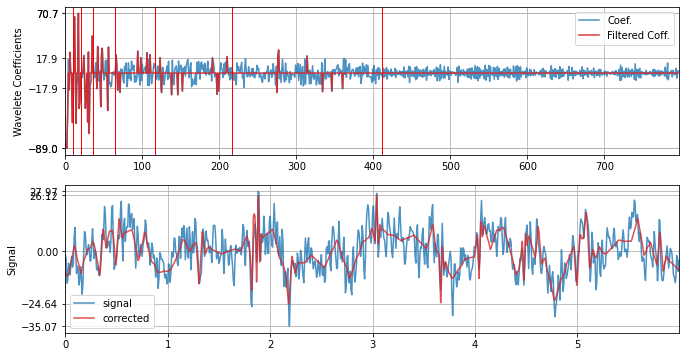

In [20]:
xf = sp.wavelet_filtering(x.copy(),wv='db3',threshold='iqr',verbose=1,WPD=False,show=True,fs=fs)

### Limit the number of levels for decomposition to 2

WPD: False  wv: db3  threshold: optimal  k: 1.5  mode: elim  filter_out_below?: True


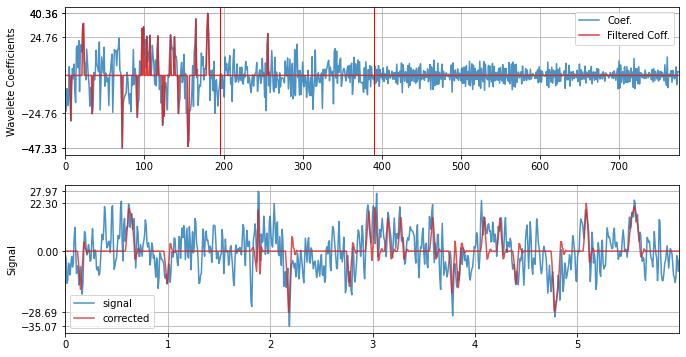

In [21]:
xf = sp.wavelet_filtering(x.copy(),wv='db3',threshold='optimal',wpd_maxlevel=2,verbose=1,WPD=False,show=True,fs=fs)

### with *db12*

WPD: False  wv: db12  threshold: optimal  k: 1.5  mode: elim  filter_out_below?: True


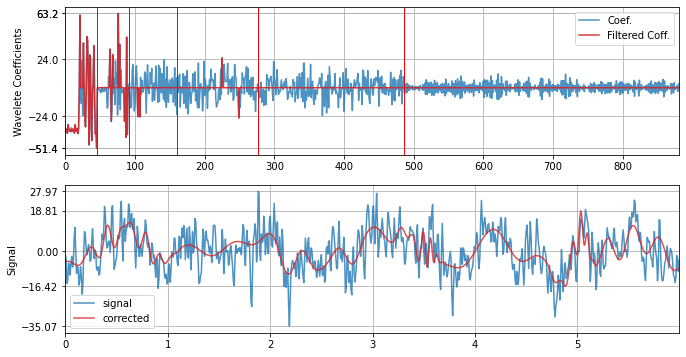

In [22]:
xf = sp.wavelet_filtering(x.copy(),wv='db12',threshold='optimal',verbose=1,WPD=False,show=True,fs=fs)

### with Symlet - *sym4*

WPD: False  wv: sym4  threshold: optimal  k: 1.5  mode: elim  filter_out_below?: True


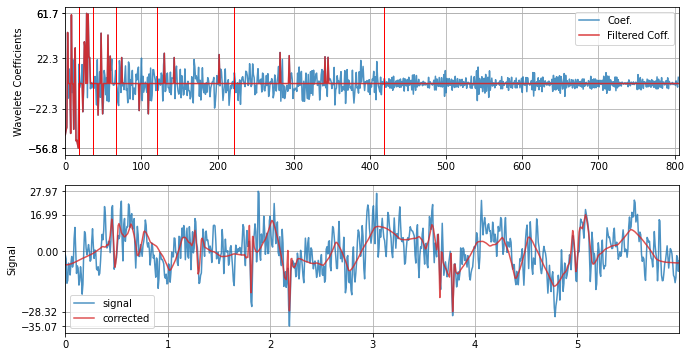

In [23]:
xf = sp.wavelet_filtering(x.copy(),wv='sym4',threshold='optimal',verbose=1,WPD=False,show=True,fs=fs)

### with Coiflet - *coif4*

WPD: False  wv: coif4  threshold: optimal  k: 1.5  mode: elim  filter_out_below?: True


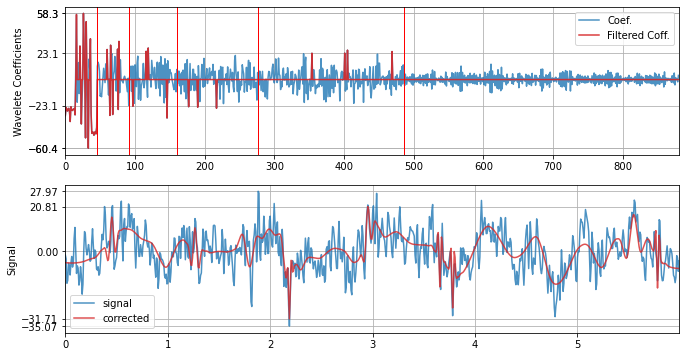

In [24]:
xf = sp.wavelet_filtering(x.copy(),wv='coif4',threshold='optimal',verbose=1,WPD=False,show=True,fs=fs)

In [30]:
help(sp.wavelet_filtering)

Help on function wavelet_filtering in module spkit.core.processing:

wavelet_filtering(x, wv='db3', threshold='optimal', filter_out_below=True, k=1.5, mode='elim', show=False, wpd_mode='symmetric', wpd_maxlevel=None, packetwise=False, WPD=True, lvl=[], verbose=False, fs=128.0, sf=1, IPR=[0.25, 0.75])
    Threshold Computation method:
    threshold: 'str' or float
             : if str, method to compute threshold, example : 'optimal', 'sd', 'iqr'
    
             'optimal': threshold = sig*sqrt(2logN), sig = median(|w|)/0.6745
             'sd' : threshold = k*SD(w)
             'iqr': threshold = q3+kr, threshold_l =q1-kr, where r = IQR(w)  #Tukey's fences
             'ttt': Modified Thompson Tau test (ttt) #TODO
             default - optimal
    
    mode: str, 'elim' - remove the coeeficient (by zering out), 'clip' - cliping the coefficient to threshold
         default 'elim'
    
    below: bool, if true, wavelet coefficient below threshold are eliminated else obove threshold
 